# Model Evaluation in Scikit-learn
https://towardsdatascience.com/model-evaluation-in-scikit-learn-abce32ee4a99

In [40]:
import pandas as pd

targets = ['red', 'white']
df_list = []
df = pd.DataFrame()

In [41]:
for target in targets:
    df_temp = pd.read_csv(f"winequality-{target}.csv", sep=';')
    
    # adds a new column, red or white
    df_temp['target'] = target
    df_list.append(df_temp)
    print(f'{target} {df_temp.shape}')

red (1599, 13)
white (4898, 13)


In [42]:
# df_list is a now a list of 2 dataframes

df = pd.concat([df_list[0], df_list[1]])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
target                   object
dtype: object

In [45]:
# function which encodes all the categorical columns
# here it's only the "target", red or white
# LabelEncoder makes the target 0 and 1

def transform_categorical(data):
    categories = (data.dtypes == "object")
    cat_cols = list(categories[categories].index)
    label_encoder = LabelEncoder()
    for col in cat_cols:
        data[col] = label_encoder.fit_transform(data[col])

In [46]:
# function which scales numerical columns

from sklearn.preprocessing import MinMaxScaler

def scale_numerical(data):
    scaler = MinMaxScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

To evaluate a regression model, the most popular metrics are:
- Mean Absolute Error — the average of the difference between the actual value and the predicted one. It  measures how far the predictions are from the actual output. The lower the MAE, the better the model.
- Root Mean Squared Error — the square root of Mean Squared Error (MSE). MSE calculates the average of the square of the difference between the actual values and the predicted ones.
- R2 score — the proportion of variance in Y that can be explained by X.

As a regression task, I want to predict the pH of each record, given the other features. I define the X and y variables as follows:

In [47]:
X = df.drop("pH", axis = 1)
y = df['pH']

In [48]:
transform_categorical(X)

In [49]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,0.38,12.8,7,1


In [50]:
scale_numerical(X)

In [51]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.191011,0.202899,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.157303,0.463768,0.500000,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.134831,0.231884,0.333333,1.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.134831,0.202899,0.500000,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.089888,0.695652,0.666667,1.0


Train test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

I define an auxiliary function that receives as input the model, and then it trains and tests it:

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [54]:
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 :", r2_score(y_test, y_pred))
    print("Mean absolute error :", mean_absolute_error(y_test, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

Now  build a linear regression model, and I test its performance

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 : 0.6508427991759347
Mean absolute error : 0.0747603132010577
RMSE : 0.09761343652989576


I also build another regression model, based on Stochastic Gradient Descent:

In [56]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
run_experiment(model)

R^2 : -0.29899908117644847
Mean absolute error : 0.14738669228334209
RMSE : 0.18827971098462376


**Note**: the first set of results matches the blog post but not the second

## Classification

In [57]:
X = df.drop("target", axis = 1)
y = df["target"]

In [58]:
transform_categorical(X)
scale_numerical(X)

In [59]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [60]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def run_experiment(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
    plt.show()
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

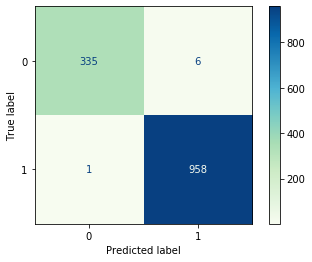

NameError: name 'precision_score' is not defined

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
run_experiment(model)

The blog post is incomplete. The writer doesn't import a lot of the sklearn stuff properly.